In [1]:
import json

In [2]:
#jsonfile = 'telegraaf'
jsonfile = 'nu.nl'
jfile = jsonfile +'.jsonl'
jsondoc = open(jfile)
jsontext = jsondoc.read()

In [3]:
posts = jsontext.split('\n')

In [4]:
#posts

In [5]:
f = open(jsonfile+"_postsperdag.txt", 'a')

In [6]:
countingPosts = dict()

In [53]:
import re


mystring = 'geerta huahuhuahuah ageert'
any([re.search(r, mystring) for r in search_list])

False

In [59]:

#search_list = ['wilders', 'geert', 'pvv', 'partij van de vrijheid']
search_list = ['wilders', '^geert\s', '\sgeert\s', '\sgeert$' , 'pvv', 'partij van de vrijheid']


for post in posts:
    #print post
    try:
        kleineletters = post.lower()
    except:
        print '<<ERROR>> '
    try:
        pjson = json.loads(kleineletters)
    except:
        print '<<OERROR>>'
        #print pjson
    try:
        message1 = pjson['description']
    except:
        message1 = ""
        #print 'no description --> ', pjson['created_time'] 
        
    try:
        message2 = pjson['message']
    except:
        #print 'no message for--> ', pjson['created_time']
        message2 = ""

    message = message1 + message2
    if message != "":
        datePost = pjson['created_time'].split('t')[0]
        #if any(x in message for x in search_list):
        if any([re.search(r, mystring) for r in search_list]):
            countingPosts[datePost] = countingPosts.get(datePost, 0) + 1
 


<<OERROR>>


In [60]:
listofdates = countingPosts.keys()

In [61]:
import pandas as pd

In [62]:
countingPosts

{u'2010-06-09': 35,
 u'2010-06-10': 158,
 u'2010-06-11': 16,
 u'2010-06-12': 12,
 u'2010-06-13': 22,
 u'2010-06-14': 86,
 u'2010-06-15': 118,
 u'2010-06-16': 12,
 u'2010-06-17': 84,
 u'2010-06-19': 20,
 u'2010-06-22': 30,
 u'2010-06-23': 36,
 u'2010-06-24': 22,
 u'2010-06-26': 26,
 u'2010-06-27': 6,
 u'2010-06-29': 60,
 u'2010-07-03': 10,
 u'2010-07-05': 18,
 u'2010-07-06': 24,
 u'2010-07-09': 6,
 u'2010-07-15': 40,
 u'2010-07-16': 10,
 u'2010-07-18': 20,
 u'2010-07-22': 32,
 u'2010-07-23': 144,
 u'2010-07-24': 36,
 u'2010-07-25': 18,
 u'2010-07-26': 24,
 u'2010-07-27': 30,
 u'2010-07-28': 24,
 u'2010-07-29': 32,
 u'2010-08-03': 100,
 u'2010-08-04': 56,
 u'2010-08-05': 58,
 u'2010-08-06': 10,
 u'2010-08-07': 20,
 u'2010-08-08': 18,
 u'2010-08-09': 44,
 u'2010-08-10': 68,
 u'2010-08-12': 56,
 u'2010-08-13': 26,
 u'2010-08-15': 40,
 u'2010-08-16': 18,
 u'2010-08-17': 48,
 u'2010-08-18': 6,
 u'2010-08-19': 32,
 u'2010-08-20': 36,
 u'2010-08-23': 60,
 u'2010-08-24': 90,
 u'2010-08-25': 24,

In [63]:
infoDates = pd.Series(countingPosts)

In [64]:
infoDates.index = infoDates.index.to_datetime()

In [65]:
infoDates.index

DatetimeIndex(['2010-06-09', '2010-06-10', '2010-06-11', '2010-06-12',
               '2010-06-13', '2010-06-14', '2010-06-15', '2010-06-16',
               '2010-06-17', '2010-06-19',
               ...
               '2016-10-31', '2016-11-03', '2016-11-11', '2016-11-16',
               '2016-11-17', '2016-11-21', '2016-11-22', '2016-11-23',
               '2016-12-03', '2016-12-09'],
              dtype='datetime64[ns]', length=250, freq=None)

In [66]:
weeks = infoDates.index.week

In [67]:
df = pd.DataFrame(infoDates)

In [68]:
df.columns = ['Posts']

In [69]:
df['Week'] = weeks

In [70]:
df['Date'] = df.index

In [71]:
getyear = lambda x: x.year

In [72]:
df['Year'] = df['Date'].apply(getyear)

In [73]:
df

,Posts,Week,Date,Year
2010-06-09,35,23,2010-06-09,2010
2010-06-10,158,23,2010-06-10,2010
2010-06-11,16,23,2010-06-11,2010
2010-06-12,12,23,2010-06-12,2010
2010-06-13,22,23,2010-06-13,2010
2010-06-14,86,24,2010-06-14,2010
2010-06-15,118,24,2010-06-15,2010
2010-06-16,12,24,2010-06-16,2010
2010-06-17,84,24,2010-06-17,2010
2010-06-19,20,24,2010-06-19,2010


In [74]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [75]:
df.groupby(['Year','Week'])['Posts'].aggregate(np.std)

Year  Week
2010  23      61.772162
      24      45.934736
      25      11.313708
      26      35.355339
      27       9.165151
      28      15.275252
      29      58.180753
      30       4.123106
      31      34.302575
      32      15.974980
      33      16.309506
      34      35.785073
      35      78.881164
      36      66.601873
      37      37.000901
      38      22.995652
      39      39.713977
      40      46.355151
      41      14.445299
      42      38.234365
      43      29.583779
      44       6.572671
      45      32.487946
      46      51.001961
      47       9.511897
      48       3.055050
      49       7.071068
      50      15.779734
2011  3             NaN
      6             NaN
                ...    
2015  10            NaN
      11       0.000000
      12            NaN
      13            NaN
      17            NaN
      22            NaN
      34            NaN
      37            NaN
      38       0.000000
      40            NaN
     

In [87]:
groupage = df.groupby(['Year','Week'])['Posts'].aggregate(sum)

In [89]:
groupage.values

array([243, 320, 120,  70,  48,  70, 230, 110, 262, 234, 140, 310, 709,
       638, 296, 172, 376, 362, 226, 268, 246,  86, 208, 426, 118,  28,
        22,  66,   6,  10,  12,  25,   6,  10,   6,  10,   6,  10,   6,
         6,  12,  10,   8,   3,   3,   3,  15,   3,   3,  15,   3,   3,
         3,   3,   9,   3,   3,  12,   9,   3,   3,   3,   3,   3,   5,
         3,   3,   3,   3,  13,   3,   3,  10,   3,   3,   3,  12,   3,
         3,   3,   3,   6,   3,   3,   3,   6,   3,   3,   3,   3,   3,
         3,   6,   3,   3,   3,   3,   9,   9,   6,   3,  12,   3,   3,
         3,   3,   6,   3,  12,   3,  12,   9,   6,   6])

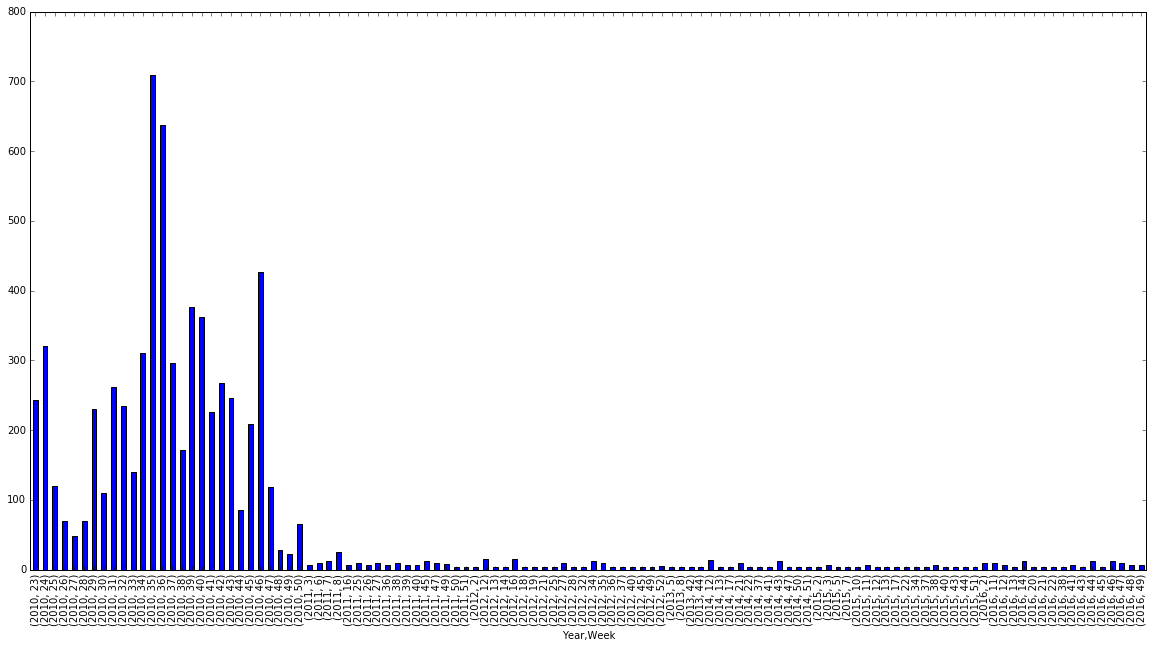

In [100]:
df.groupby(['Year','Week'])['Posts'].aggregate(sum).plot(kind='bar', figsize=(20,10))